# 无监督学习

## 概述

无监督学习就是在一堆没有标签化，没有进行过分类的数据中，发现它们之间的共性，然后利用它们之间的共性对新的数据进行操作。我们将实现两种无监督学习算法：k-means 和 EM 算法。

高斯混合模型是 EM 算法的一个应用，它可以从一堆若干类的样本集中提取出不同类的高斯模型出来，我们通过以下内容实现一个高斯混合模型:

1. 实现 k-means 聚类。

2. 通过在简单数据集上运行它来熟悉算法。

3. 构建一个经过期望最大化训练的高斯混合模型。

4. 改进高斯混合模型实现的细节。

5. 实现一种新的度量（贝叶斯信息准则），以得到更鲁棒的模型。


## Part 0: NumPy

使用 numpy 来对数据进行处理，而不是 for 循环，能够极大地提高运行速度，尤其当数据量较大时。

以下是使用 numpy 库中的函数进行运算的例子。


#### 元素乘法
使用 np.multiply 或者运算符 * 实现矩阵元素相乘。

In [1]:
import numpy as np
x = np.array([[1,2,3,4], 
              [5,6,7,8]])
y = np.array([[1,2,3,4], 
              [5,6,7,8]])
output_multiply = np.multiply(x, y)
output_op = x * y
print(f'using np.multiply()    \n {output_multiply}')
print(f'using *  \n {output_op}')

using np.multiply()    
 [[ 1  4  9 16]
 [25 36 49 64]]
using *  
 [[ 1  4  9 16]
 [25 36 49 64]]


In [2]:
output_power = np.power(x, 2)
print(f'using np.power  \n {output_power}')

using np.power  
 [[ 1  4  9 16]
 [25 36 49 64]]


#### 内积
使用 np.dot() 或者 self.dot() 来实现向量间的内积运算。 

In [3]:
p = np.array([1,2,3,4])
q = np.array([5,6,7,8])
output_dot = np.dot(p, q)
output_sdot = p.dot(q)
print(f'using np.dot()    \n {output_dot}')
print(f'using self.dot()  \n {output_sdot}')

using np.dot()    
 70
using self.dot()  
 70


In [4]:
m = np.array([[1,2,3,4]])
n = np.array([[5,6,7,8]])
output_ndot = np.dot(m, n.T)
output_nsdot = m.dot(n.T)
print(f'using np.dot()    \n {output_ndot}')
print(f'using self.dot()  \n {output_nsdot}')

using np.dot()    
 [[70]]
using self.dot()  
 [[70]]


#### 矩阵乘法
使用 np.dot(), self.dot(), 运算符 '@', np.matmul, 或者 einsum 来实现矩阵乘法运算。

In [5]:
x = np.array([[1,2,3,4], 
              [5,6,7,8]])
y = np.array([[1,2,3,4], 
              [5,6,7,8]])
output_ndot = np.dot(x, y.T)
output_nsdot = x.dot(y.T)
output_nop = x @ y.T
output_matmul = np.matmul(x, y.T)
output_esum = np.einsum('ij, jk-> ik', x, y.T)
print(f'using np.dot()    \n {output_ndot}')
print(f'using self.dot()  \n {output_nsdot}')
print(f'using operator @  \n {output_nop}')
print(f'using np.matmul  \n {output_matmul}')
print(f'using np.einsum  \n {output_esum}')

using np.dot()    
 [[ 30  70]
 [ 70 174]]
using self.dot()  
 [[ 30  70]
 [ 70 174]]
using operator @  
 [[ 30  70]
 [ 70 174]]
using np.matmul  
 [[ 30  70]
 [ 70 174]]
using np.einsum  
 [[ 30  70]
 [ 70 174]]


#### Einsum
使用爱因斯坦求和约定，可以以简单的方式表示许多常见的多维线性代数数组运算。

In [6]:
m, n = 1000, 500

x = np.random.rand(m, n)
y = np.random.rand(m, n)

output_trace_fast = np.einsum('ij, ji->', x, y.T)
print(f'Trace of the product of x and y: {output_trace_fast}')


%timeit np.trace(x.dot(y.T))

%timeit output_trace_fast = np.einsum('ij, ji->', x, y.T)

Trace of the product of x and y: 124816.40155570637
7.89 ms ± 258 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
247 µs ± 3.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### numpy 的一些技巧和函数


#### 索引

In [7]:
x = np.random.rand(50, 50, 50)
y = x[0, :, :]


x = np.arange(10)
print(x)

print(x[::-1])


x = np.arange(10)
print(x==1)
print(np.where(x==1))

print(np.where(x!=1, x, 11))

[0 1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1 0]
[False  True False False False False False False False False]
(array([1], dtype=int64),)
[ 0 11  2  3  4  5  6  7  8  9]


#### 函数或运算
1. `np.concatenate()` - 沿着特定轴组合两个数组
2. `np.zeros(), np.ones()` - 创建具有指定维度的 0 和 1 数组
3. `x[start:end]` - 将数组从'start'位置切片到'end'位置，可在不同的轴使用
4. `np.diagonal()` - 取出矩阵对角线上的元素
5. `np.reshape()` - 更改数组的形状

## Part 1: K-means 聚类

k-means 聚类是一种简单的图像分割方法，它将所有相似的数据点聚在一起，然后用平均值替换它们的值。

在 `get_initial_means()` 函数中，应该从数据中随机选择 k 个点作为集群的初始点，此时集群的均值就是每个点的值。

在 `k_means_step()` 函数中，我们根据 k 个集群的均值对数据进行分类，每个点都将分到一个集群中，之后我们将根据集群中的点重新计算集群的均值 new_means。

#### 需要完成的函数：
1. `get_initial_means()`
2. `k_means_step()`


In [8]:
%load_ext autoreload
%autoreload 2

from ipywidgets import * # interactive
import mixture_tests as tests
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from scipy.stats import norm
import os
import numpy as np
from helper_functions import *

In [9]:
#export
import numpy as np
from helper_functions import *

In [10]:
#export
def get_initial_means(array, k):
    newArr = array.copy()     # 拷贝array
    np.random.shuffle(newArr) # 随机打乱
    return newArr[:k]         # 选择k个点 
    

In [11]:
#export
def k_means_step(X, k, means):
    m, n = X.shape 
    
    # 计算行向量的二范数(X中每个行向量与mean的距离)
    eucDist = np.zeros(shape=(m, k), dtype=float)
    for i in range(k):
        eucDist[:, i] = np.linalg.norm(X - means[i], axis = 1) 
        
    clusters = np.argmin(eucDist, axis=1) # 进行聚类，X中每个行向量与mean的最短距离的索引(1 - k)，即每个行向量分到的类
    
    # 计算每个类的新均值
    new_means = np.ndarray(shape=(k, n), dtype=float)
    for i in range(k):
        points = X[np.where(clusters == i)]
        new_means[i] = np.average(points, axis=0)
        
    return (new_means, clusters)



#### K-means - 可视化结果

现在我们已经完成了 K-means 步骤的实现，让我们尝试可视化如果多次重复这些步骤会发生什么。


In [12]:
def K_means_2D_dataset(dataset_index, K):
    X = np.loadtxt("data/%d_dataset_X.csv" % dataset_index, delimiter=",")
    print("The dataset is of a size:", X.shape)

    y = np.int16(np.loadtxt("data/%d_dataset_y.csv" % dataset_index, delimiter=","))

    n_iterations = 20
    m,n = X.shape
    means = get_initial_means(X,K)
    clusters = np.zeros([n])
    
    means_history = [means]
    clusters_history = [clusters] 
    for iteration_i in range(n_iterations):
        means, clusters = k_means_step(X, K, means)
        clusters_history.append(clusters)

    return X, y, means_history, clusters_history


In [13]:
dataset_index = 2 # [0,4]
K = 3 # 集群数

X, y, means_history, clusters_history = K_means_2D_dataset(dataset_index, K)

def get_cluster(i):
    clusters = clusters_history[i] 
    plt.figure(None, figsize=(15,6)) 
    plt.suptitle('Drag the slider to see the algorthm training progress')
    ax1=plt.subplot(1, 2, 1)
    ax1.set_title('K-means clusters - step %d' % i)
    for k in range(K):
        plt.plot(X[clusters==k,0], X[clusters==k,1], '.') 
    
    ax2=plt.subplot(1, 2, 2)
    ax2.set_title('Ground truth clusters')
    for i in np.unique(y):
        ax2.plot(X[y==i,0],X[y==i,1],'.')

    plt.show()

interactive(get_cluster, i=(1,len(clusters_history)-1,1))

The dataset is of a size: (1000, 2)


interactive(children=(IntSlider(value=10, description='i', max=20, min=1), Output()), _dom_classes=('widget-in…

### 图像分割
现在是时候使用 K-means 进行图像分割了。

我们将使用 K-means 算法将图像的 RGB 值分离到 k 个集群中，然后将图像的原始值替换为相应的集群中心值，重构图像以观察效果。

显然，当分配的聚类停止变化时，算法达到收敛。然而，这个收敛的过程可能相当慢，因此我们设定一个最大迭代次数。

我们将使用彩色图像来检验 K-means 进行图像分割的效果。

#### 需要完成的函数：
1. `k_means_segment()`


In [14]:
#export
def k_means_segment(image_values, k=3, initial_means=None):
    r, c, ch = image_values.shape
    
    #创建一个k_means_step可以处理的矩阵
    dataPoints = np.reshape(image_values, (r * c, ch))
    # 当没有提供初始聚类时，自行初始化
    if initial_means is None:
        startMeans = get_initial_means(dataPoints, k)
    else:
        startMeans = initial_means.copy()
    
    currClusters = np.zeros(shape=r * c,dtype=int) # 新的集群  
    # 循环直到收敛
    max_step = 256 # 最大迭代次数
    #while True:
    for i in range(max_step):
        prevClusters = currClusters.copy() 
        updatedMeans, currClusters = k_means_step(dataPoints, k, startMeans)
        startMeans = updatedMeans
        if (np.array_equal(prevClusters, currClusters)): # 收敛时结束循环
            break
    
    # 将原始值替换为相应的集群值并重构图像
    updated_image_values = np.reshape(updatedMeans[currClusters], (r, c, ch))
    return updated_image_values


### 可视化 K-means 进行图像分割的结果

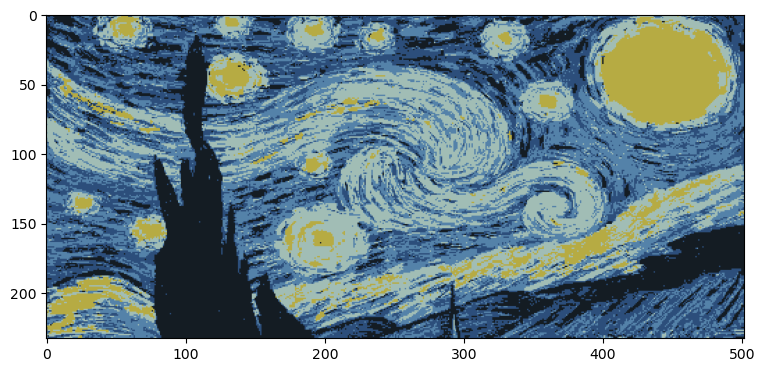

In [15]:
k=5 

image_values = image_to_matrix('images/Starry.png')

new_image = k_means_segment(image_values, k=k)

plt.figure(None,figsize=(9,12))
plt.imshow(new_image)
plt.show()

## Part 2:  实现一个多元高斯混合模型

接下来，我们试着引入高斯分布来实现一个多元高斯期望最大化(Multivariate Gaussian Expectation Maximization)算法。EM 算法是一种通用算法，它允许人们迭代计算统计分布的最大似然估计量。在我们的方案中，我们关注的是高斯混合模型的最大似然估计量(MLEs)。

- - - 

以下函数将会被组装成一个多元高斯期望最大化算法：

1. 计算给定数据点(例如像素的 rgb 值)属于特定高斯分量的概率。

2. 使用期望最大化(EM)训练模型，将图像表示为高斯的混合。

3. 计算训练模型的对数似然。在 default_convergence() 中为你设置了收敛条件(参见 helper_functions.py 文件)：如果连续 10次迭代，新的似然值在之前似然值的 10% 以内，则模型已经收敛。

4. 根据训练好的模型对图像进行分割。

5. 通过在模型训练和评分上迭代来确定最佳分割，因为 EM 不能保证收敛到全局最大值。初始化时 k 个点的选取完全是随机的，实际上算法对这初始化的 k 个中心是非常敏感的。

#### 需要完成的函数：
1. `initialize_parameters()`
2. `prob()`
3. `E_step()`
4. `M_step()`
5. `likelihood()`
6. `train_model()`
7. `cluster()`
8. `segment()`
9. `best_segment()`

首先确保协方差矩阵的计算是正确的（不正确地计算协方差矩阵可能会导致在后面的函数实现中变得极其难以调试的问题）。

In [16]:
#export
def compute_sigma(X, MU):
    m, n = X.shape
    k = MU.shape[0]
    
    x = np.multiply(np.ones((k, m, n)), X)
    MU = np.expand_dims(MU, axis=1)
    meanX = x - MU
    
    sigma = np.matmul(meanX.swapaxes(-1, -2), meanX)  # 后两个维度矩阵乘法  
    return sigma / (m-1)


初始化 EM，将每个分量的均值设置为随机选择像素的均值(与 K-means 相同)，并根据所选均值计算协方差，并将混合系数设置为均匀分布。

In [17]:
#export
def initialize_parameters(X, k):
    n = X.shape[1]
    
    MU = get_initial_means(X, k) # 初始化
    sigma = compute_sigma(X, MU) # 计算协方差
    
    coeff = float(1. / k)
    pi = np.array([coeff]*k) # coeff * np.ones(shape=(k, 1), dtype=float)

    return (MU, sigma, pi)

根据均值和协方差给出了一个概率密度估计，prob 函数实际上并不是在计算概率，而是在计算概率密度。

注意 x 是单个数据点和数据点数组这两种情况。


In [18]:
#export
def prob(x, mu, sigma):
    # 判断x是否是单个点
    if len(x.shape) == 1:
        x = np.expand_dims(x, axis=0)
    mx = x - mu
    n = x.shape[-1]

    # 计算高斯分布的概率密度
    # 系数部分
    denominator = (2 * np.pi) ** (n / 2.)
    denominator *= (np.sqrt(np.linalg.det(sigma))) # sigma的行列式
    # 指数部分
    power = np.einsum('ij, jk', mx, np.linalg.inv(sigma)) # 矩阵乘法 
    power = np.einsum('ij, ij->ij', power, mx)        # 点乘
    power = -0.5 * np.sum(power.T, axis = 0)
    
    return np.exp(power) / denominator


单步 1，计算每个集群的概率密度估计（责任矩阵）。

In [19]:
#export
def E_step(X,MU,SIGMA,PI,k):
    m, n = X.shape
    if len(PI.shape) == 1:
        PI = np.expand_dims(PI, axis=1)
    
    # 快速方法，mx[i] = X - MU[i]
    x = np.multiply(np.ones((k, m, n)), X)
    MU = np.expand_dims(MU, axis=1)
    mx = x - MU
    
    # 计算高斯分布的概率密度
    # 系数部分
    denominator = (2 * np.pi) ** (n / 2.)
    denominator *= (np.sqrt(np.linalg.det(SIGMA))) # sigma的行列式
    # 指数部分
    power = np.matmul(mx, np.linalg.inv(SIGMA))   # 后两个维度矩阵乘法   
    power = np.multiply(power, mx)                # 后两个维度点乘
    power = -0.5 * np.sum(power.swapaxes(-1, -2), axis = 1)
    responsibility = np.exp(power) / np.expand_dims(denominator, axis=1)
    responsibility = responsibility * PI
    '''
    responsibility = np.ndarray(shape=(k, m), dtype=float)
    for i in range(k): # 非最快
        compMu = MU[i]
        compSigma = SIGMA[i]
        compPi = PI[i]
        
        probVals = prob(X, compMu, compSigma)
        responsibility[i] = compPi * probVals 
    '''
    
    return np.divide(responsibility, np.sum(responsibility, axis=0)) # 归一化概率密度


单步 2，根据责任矩阵重新计算均值、协方差和混合系数。

In [20]:
#export
def M_step(X, r, k):
    m, n = X.shape
    
    # 计算k个类的新系数和权重
    maxCoeff = np.sum(r, axis=1)
    new_PI = np.divide(maxCoeff, m)
    # 计算k个类的新的均值
    summation = np.matmul(r, X)
    new_MU = np.divide(summation.T, maxCoeff).T
    # 计算新的协方差矩阵(快速方法)
    x = np.multiply(np.ones((k, m, n)), X)
    MU = np.expand_dims(new_MU, axis=1)
    mx = x - MU
    
    product = np.multiply(mx, np.expand_dims(r, axis=2))
    product = np.matmul(product.swapaxes(-1, -2), mx) 
    new_SIGMA = np.divide(product, np.expand_dims(maxCoeff, axis=[1,2]))
    '''
    new_SIGMA = np.ndarray(shape=(k, n, n), dtype=float)
    for i in range(k):
        product = np.multiply(X - new_MU[i], r[i].reshape(m, 1))
        product = np.dot(product.T, (X - new_MU[i]))
        new_SIGMA[i] = np.divide(product, maxCoeff[i])
    '''
    
    return (new_MU, new_SIGMA, new_PI)


计算训练模型的对数似然。

In [21]:
#export
def loglikelihood(X, PI, MU, SIGMA, k):
    m, n = X.shape
    
    # 扩展维度
    x = np.multiply(np.ones((k, m, n)), X)
    MU = np.expand_dims(MU, axis=1)
    mx = x - MU
    
    # 系数部分
    denominator = (2 * np.pi) ** (n / 2.)
    denominator *= (np.sqrt(np.linalg.det(SIGMA))) # sigma的行列式
    # 指数部分
    power = np.matmul(mx, np.linalg.inv(SIGMA))   # 后两个维度矩阵乘法   
    power = np.multiply(power, mx)                # 后两个维度点乘
    power = -0.5 * np.sum(power.swapaxes(-1, -2), axis = 1)
    
    # 计算高斯概率
    probMat = np.exp(power) / np.expand_dims(denominator, axis=1)
    responsibility = probMat * np.expand_dims(PI, axis=1)
    '''
    responsibility = np.ndarray(shape=(k, m), dtype=float)
    # 计算加权概率
    for i in range(k):
        compMu = MU[i]
        compSigma = SIGMA[i]
        compPi = PI[i]
        # 系数部分
        denominator = (2 * np.pi) ** (float(n) / 2.) * (np.sqrt(np.linalg.det(compSigma)))
        denominator = np.power(denominator, -1)
        # 指数部分
        center = X - compMu
        sigInv = np.linalg.inv(compSigma)
        centerTrans = center.T
        multByInv = np.dot(center, sigInv) 
        power = np.expand_dims(np.sum(np.multiply(multByInv, center), axis=1), axis=0)
        power = power * (-0.5)
        # 概率分布
        probMat = np.exp(power) * denominator
        # pi * N(x|mu, sigma)
        responsibility[i] = np.dot(compPi, probMat)
    '''
    # 集群求和
    clusterSum = np.sum(responsibility, axis=0)
    # Take the log before summing across points
    return np.sum(np.log(clusterSum))


训练混合模型，迭代 E_step 和 M_step 直到收敛(似然值判定)。

In [22]:
#export
def train_model(X, k, convergence_function, initial_values = None):
    lastIterLikelihood = 0 # 旧的迭代可能性
    max_Iter = 100         # 最大迭代次数
    convCounter = 0        # 一个用来跟踪发生了多少次收敛的计数器
    
    # 当没有提供初始均值、协方差、系数时，自行初始化
    if initial_values is None:
        startValues = initialize_parameters(X, k)
    else:
        startValues = initial_values

    for i in range(max_Iter):
        # 计算训练模型新的对数似然
        currLikelihood = loglikelihood(X, startValues[2], startValues[0], startValues[1], k)
        # 根据对数似然的变化判断是否发生收敛，达到一定的收敛次数后中断训练
        convCounter, convergence = convergence_function(lastIterLikelihood, currLikelihood, convCounter)
        if convergence: # 中断
            break
        lastIterLikelihood = currLikelihood
        # 计算责任
        resp = E_step(X, startValues[0], startValues[1], startValues[2], k)
        # 根据责任计算更新均值、协方差、系数
        startValues = M_step(X, resp, k)
        
    return (startValues[0], startValues[1], startValues[2], resp)


根据责任矩阵得到使得似然值最大的集群索引(分类)。

In [23]:
#export
def cluster(r):
    # 根据责任矩阵得到使得似然值最大的集群索引。
    return np.argmax(r, axis=0)


每个数据点被替换为集群值(最大似然分量均值)。

In [24]:
#export
def segment(X, MU, k, r):
    # 每个数据点被替换为其最大似然分量均值
    index = cluster(r)
    return MU[index]


通过反复训练模型并计算其似然，确定图像的最佳分割。

In [25]:
#export
def best_segment(X,k,iters):
    bestLikelihood = 0                        # 最大似然值
    for i in range(iters):
        startValues = initialize_parameters(X, k) # 初始化均值、协方差、系数
        currVals = train_model(X, k, default_convergence, startValues)               # 更新均值、协方差、系数
        currLikelihood = loglikelihood(X, currVals[2], currVals[0], currVals[1], k)  # 计算对数似然值
        if (currLikelihood > bestLikelihood):
            bestLikelihood = currLikelihood # Save best likelihood so far
            bestVals = currVals # Same for the best values so far
    return bestLikelihood, segment(X, bestVals[0], k, bestVals[3])


#### 高斯混合模型 - 可视化结果

现在我们已经完成了 EM 算法的实现，让我们尝试可视化如果多次重复这些步骤会发生什么。


In [26]:
def GMM_2D_dataset(dataset_index, K):
    X = np.loadtxt("data/%d_dataset_X.csv" % dataset_index, delimiter=",")
    print("There are %d datapoints in the current dataset, each of a size %d" % X.shape)
    print("""\nNote that that the Gaussian Ellipses and Normal Curves may not share the
same color as the points they represent (within the same chart).
In fact, the Gaussian Ellipses and Normal Curves represent the clusters
in the top left chart (and thus share colors with those points).""")
    
    y = np.int16(np.loadtxt("data/%d_dataset_y.csv" % dataset_index, delimiter=","))
    
    MU, SIGMA, PI = initialize_parameters(X, K)
    
    clusters_history = []
    statistics_history = []
    for _ in range(200):
        r = E_step(X,MU,SIGMA,PI,K)
        new_MU, new_SIGMA, new_PI = M_step(X, r, K)
        PI, MU, SIGMA = new_PI, new_MU, new_SIGMA
        clusters = cluster(r)
        clusters_history.append(clusters)
        statistics_history.append((PI, MU, SIGMA))

    return X, y, clusters_history, statistics_history

In [27]:
dataset_index = 3 #  [0,5]
K = 3 # 集群数
X, y, clusters_history, statistics_history = GMM_2D_dataset(dataset_index, K)

def setup_subplot(plt, i, title, plot_number):
    ax = plt.subplot(2, 2, plot_number)
    ax.set_title(title)
    ax.patch.set_facecolor('gray')
    ax.patch.set_alpha(0.1)
    return ax

def plot_gaussian_ellipse(k, mean, covar, ax2, colors):
    v,w = np.linalg.eig(covar)
        
    angle = np.arctan(w[1,0] / w[0,0])
    angle = 180 * angle / np.pi
    
    color = colors[k % len(colors)]
    for i in range(3,8):
        plot_v = i * np.sqrt(v)
        ellipse = pat.Ellipse(mean, plot_v[0], plot_v[1], angle, fill = True, alpha = 0.10, lw = 1.0, ls = 'dashdot', ec = 'black', fc = color, zorder = 0)
        ax2.add_artist(ellipse)

def plot_gaussian(X, mean, var, X_min, X_max, ax):
    samples = np.linspace(X_min, X_max, 100)
    ax.plot(samples, norm.pdf(samples, mean, var))
    

def get_cluster(i):
    clusters = clusters_history[i] # Get the clusters from K-means' i-th iteration
    cluster_means = statistics_history[i][1]
    cluster_covar = statistics_history[i][2]
    
    plt.figure(None, figsize=(15,12)) # Set the plot size
    plt.suptitle('Drag the slider to see the algorithm training progress')
    
    ax1 = setup_subplot(plt, i, 'GMM clusters - step %d' % i, 1)
    ax2 = setup_subplot(plt, i, 'Ground truth clusters', 2)
    ax3 = setup_subplot(plt, i, 'GMM Gausians X1 - step %d' % i, 3)
    ax4 = setup_subplot(plt, i, 'GMM Gausians X2 - step %d' % i, 4)
    
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    for k in range(K):
        ax1.plot(X[clusters==k, 0], X[clusters==k, 1], '.')
        
        mean = cluster_means[k]
        covar = cluster_covar[k]
        
        plot_gaussian_ellipse(k, mean, covar, ax2, colors)
        plot_gaussian(X[clusters==k, 0], mean[0], covar[0,0], np.min(X[:, 0]), np.max(X[:, 0]), ax3)
        plot_gaussian(X[clusters==k, 1], mean[1], covar[1,1], np.min(X[:, 1]), np.max(X[:, 1]), ax4)
    
    ax3.set_prop_cycle(None)
    ax4.set_prop_cycle(None)
    
    for i in np.unique(y):
        ax2.plot(X[y==i,0], X[y==i,1],'.', zorder=10)
        ax3.plot(X[y==i,0], np.zeros(X[y==i,0].shape[0]), '.', zorder = 10)
        ax4.plot(X[y==i,1], np.zeros(X[y==i,1].shape[0]), '.', zorder = 10)
    
    plt.show()

interactive(get_cluster, {'manual': True}, i=(0,len(clusters_history)-1,1))

There are 1000 datapoints in the current dataset, each of a size 2

Note that that the Gaussian Ellipses and Normal Curves may not share the
same color as the points they represent (within the same chart).
In fact, the Gaussian Ellipses and Normal Curves represent the clusters
in the top left chart (and thus share colors with those points).


interactive(children=(IntSlider(value=99, description='i', max=199), Button(description='Run Interact', style=…

### 可视化高斯混合模型的图像压缩结果

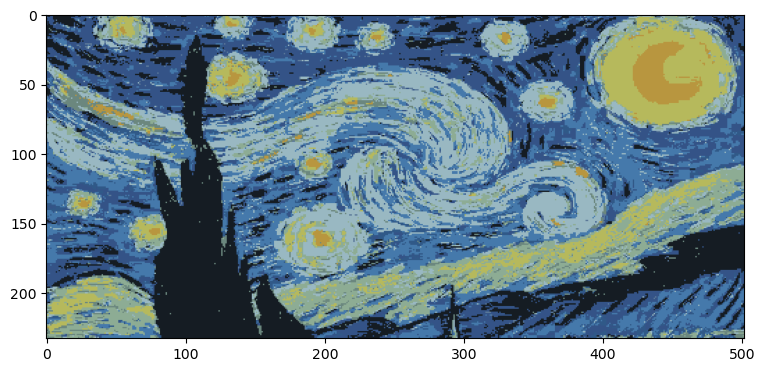

In [28]:
image_file = 'images/Starry.png' 
original_image_matrix = image_to_matrix(image_file) 
image_matrix = original_image_matrix.reshape(-1,3) 
K = 10 # K

_, best_seg = best_segment(image_matrix, K, iters = 10)
new_image = best_seg.reshape(*original_image_matrix.shape) # reshape collapsed matrix to original size

plt.figure(None,figsize=(9,12))
plt.imshow(new_image)
plt.show()

---

## Part 3:  模型改进

现在，我们将尝试做出改进来提高高斯混合模型的性能。

## Part 3a:  改进初始化函数

通过训练一个高斯混合模型来寻找初始均值。这种类型的初始化不同于简单地增加训练时间，因为我们“重置”了协方差和混合系数参数。

也就是说，对于训练，我们根据初始化期间学到的均值重新计算协方差参数，并再次将混合系数设置为均匀分布。

一个 GMM 倾向于收敛到拉长的协方差，所以通过重置这些参数我们有更高的机会避免局部极大值（相比于随机初始化）。


In [29]:
#export
def improved_initialization(X, k):
    n = X.shape[1]
    
    bestLikelihood = float("-inf") # 最大似然值
    # 训练一个 GMM 来寻找初始均值
    for i in range(10):
        # 获得均值、协方差、系数、责任
        values = train_model(X, k, default_convergence) 
        # 计算对数似然值
        currLikelihood = loglikelihood(X, values[2], values[0], values[1], k)
        if (currLikelihood > bestLikelihood):
            bestLikelihood = currLikelihood 
            bestVals = values

    coeff = float(1. / k)
    pi = np.array([coeff]*k) # coeff * np.ones(shape=(k, 1), dtype=float)
    
    return bestVals[0], bestVals[1], pi


## Part 3b: 收敛条件

实现 `new_convergence_condition()` 函数，它给出一个新的收敛条件。如果连续 10次迭代，所有新的模型参数(均值、方差和混合系数)都在前一个变量的 10%以内，则返回 true。

同时，我们需要在 `train_model_improved()` 函数中重新实现 `train_model()` 。


In [30]:
#export
def new_convergence_function(previous_variables, new_variables, conv_ctr,
                             conv_ctr_cap=10):
    # 旧的均值、协方差、系数
    prevMean = previous_variables[0]
    prevVar = previous_variables[1]
    prevMC = previous_variables[2]
    # 若为空返回0次迭代
    if (prevMean is None or prevVar is None or prevMC is None):
        return 0, 0 > conv_ctr_cap
    
    # 新的均值、协方差、系数
    newMean = new_variables[0]
    newVar = new_variables[1]
    newMC = new_variables[2]
    # 判断新旧各参数相差是否在10%以内
    if (np.allclose(prevMean, newMean, rtol=0.1) and np.allclose(prevVar, newVar, rtol=0.1) and np.allclose(prevMC, newMC, rtol=0.1)):
        conv_ctr += 1 # 迭代计数器+1
    else:
        conv_ctr = 0  # 迭代计数器清零
    # 能够连续迭代 conv_ctr_cap 次，返回true
    return conv_ctr, conv_ctr > conv_ctr_cap


def train_model_improved(X, k, convergence_function = new_convergence_function, initial_values = None):
    max_Iter = 2500        # 最大迭代次数
    convCounter = 0        # 一个用来跟踪发生了多少次收敛的计数器
    
    # 当没有提供初始均值、协方差、系数时，自行初始化
    if initial_values is None:
        startValues = improved_initialization(X, k)
    else:
        startValues = initial_values

    for i in range(max_Iter):
        prevParams = startValues
        # 计算责任
        resp = E_step(X, startValues[0], startValues[1], startValues[2], k)
        # 根据责任计算更新均值、协方差、系数
        startValues = M_step(X, resp, k)
        # 是否发生收敛，达到一定的收敛次数后中断训练
        convCounter, convergence = convergence_function(prevParams, startValues, convCounter)
        if convergence: # 中断
            break
    
    return (startValues[0], startValues[1], startValues[2], resp)


## Part 4: 贝叶斯信息准则

在上述方案中，我们选择模型的唯一标准是它是否使后验似然最大化，而不管它需要多少参数。因此，“最佳”模型可能只是具有最多参数的模型，这将对训练数据过度拟合。

为了避免过拟合，我们可以使用贝叶斯信息准则(BIC)，它会根据模型使用的参数数量来惩罚模型。这里惩罚包括复杂度惩罚和精度惩罚，显然，复杂度惩罚与模型参数（最主要是集群数）有关，精度惩罚与似然值有关。


## Part 4a: 实现贝叶斯信息准则

实现 `bayes_info_criterion()` 函数，它将用于计算训练好的高斯混合模型的 BIC。

BIC 的计算公式如下：
BIC = ln(m)k–2 * In(L) (m - 样本数量, k - 参数量, L - 似然值)  
值得注意的是，`k` 在 BIC 中是模型估计的参数个数，而不是聚类值。显然，`k` 由均值、协方差和混合系数的参数个数确定。

In [31]:
#export
def bayes_info_criterion(X, PI, MU, SIGMA, k):
    m, n = X.shape
    
    # BIC=ln(m)k–2 * In(L) (m - 样本数量, k - 参数量, L - 似然值)
    num_of_param = k * n + k * n * (n + 1) / 2 + k                          # 参数量 - MU, SIGMA(注意对称性), PI
    bic = np.log(m) * num_of_param - 2 * loglikelihood(X, PI, MU, SIGMA, k) # 复杂度惩罚 + 精度惩罚
    return np.round(bic)


## Part 4b: 测试贝叶斯信息准则

在 `BIC_likelihood_model_test()`函数中，你将使用 BIC 和 似然值 来确定 `image_matrix` 的最佳聚类值。

使用 `train_model_improved()` 函数， 遍历所提供的均值列表（`comp_means`）， 训练一个最小化 BIC 的模型和一个最大化似然值的模型。

`comp_means` 是一个列表，其中每个元素是一个 k x n 的均值矩阵（k 是聚类值）。


In [32]:
#export
def BIC_likelihood_model_test(image_matrix, comp_means):
    m,n = image_matrix.shape
    
    bestKLikelihood = 0    # The best K value to use for likelihood
    bestLikelihood = float("-inf")
    bestKbic = 0           # The best k value to use when min BIC is your criteria
    bestBIC = float("inf")

    for i in range(len(comp_means)): 
        # 集群数与协方差
        compNum = comp_means[i].shape[0]
        sigma = compute_sigma(image_matrix, comp_means[i])
        
        # 初始化系数
        coeff = float(1./compNum)
        pi = np.ones((compNum,1)) * coeff
        
        # 训练模型
        values = train_model_improved(image_matrix, compNum, new_convergence_function, (comp_means[i], sigma, pi))
        # 计算对数似然和贝叶斯信息
        currLikelihood = loglikelihood(image_matrix, values[2], values[0], values[1], compNum)
        currBIC = bayes_info_criterion(image_matrix, values[2], values[0], values[1], compNum)
        
        if currLikelihood > bestLikelihood:  # 最大似然
            bestLikelihood = currLikelihood
            bestKLikelihood = compNum
        if currBIC < bestBIC:                # 最小惩罚
            bestBIC = currBIC
            bestKbic = compNum

    return bestKbic, bestKLikelihood

image_file = 'images/Starry.png' # Image path
original_image_matrix = image_to_matrix(image_file) # Save original image
image_matrix = original_image_matrix.reshape(-1,3) # collapse the dimension

comp_means = []
for k in range(2,8):
    comp_means.append(initialize_parameters(image_matrix, k)[0])

bestKbic, bestKLikelihood = BIC_likelihood_model_test(image_matrix, comp_means)
print(bestKbic, bestKLikelihood)

6 6


---

## Part 5: 点云数据分割

接下来我们将对点云数据进行分割。

RGBD (RGB + Depth)数据通常存储为两张分开的图像，一张包含 RGB(颜色)信息，另一张只包含深度，因此是灰度图像。让我们加载一个数据样本来可视化它。


In [33]:
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


分别加载 RGB 图和深度图。

In [34]:
# 加载图像数据
def load_rgbd_image(image_path, depth_path):
    color_raw = o3d.io.read_image(image_path)    
    depth_raw = o3d.io.read_image(depth_path)  
    return color_raw, depth_raw

# 绘制图像
def plot_rgbd(color_image, depth_image):
    plt.figure(None,(15,15))
    plt.subplot(1, 3, 1)
    plt.title('Color image')
    plt.imshow(color_image)
    plt.subplot(1, 3, 2)
    plt.title('SUN depth image')
    plt.imshow(depth_image)
    plt.show()

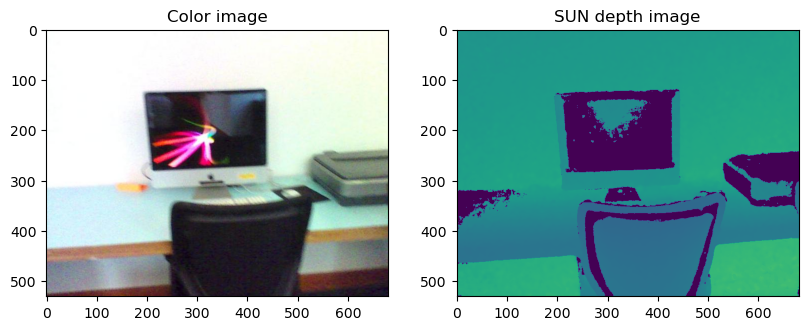

In [35]:
import glob
from PIL import Image
%matplotlib inline
rgbd_dataset = glob.glob('rgbd/image/*.jpg') 
image_number = 3 # [0,4] 

image_file = rgbd_dataset[image_number]
depth_file = image_file.replace('image','depth')[:-4] + '.png'
assert os.path.isfile(image_file); 
assert os.path.isfile(depth_file);
color_image, depth_image = load_rgbd_image(image_file, depth_file)
plot_rgbd(color_image, depth_image)

将深度图转换为点云图。

点云数据表示为大小为M × N的未排序集合，其中M为点的个数，N为每个点的x、y、z值。你可以在 `pcd.colors` 中访问颜色数据。

In [36]:
def show_point_cloud(color_raw, depth_raw):
    rgbd_image = o3d.geometry.RGBDImage.create_from_sun_format(color_raw, depth_raw);
    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgbd_image, 
                 o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
    # 翻转,否则点云将颠倒͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏︇͏️͏󠄆
    pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
    o3d.visualization.draw_geometries([pcd])
    return pcd

In [37]:
pcd = show_point_cloud(color_image, depth_image)
pcd_points = np.asarray(pcd.points)
print("Point cloud data - shape:", pcd_points.shape)

Point cloud data - shape: (307419, 3)


尝试对刚刚加载的图像进行分割。

In [38]:
# 设定集群数
K = 5
initial_params = improved_initialization(pcd_points, K)
MU, SIGMA, PI, r = train_model_improved(pcd_points, K,
                               convergence_function = new_convergence_function,
                               initial_values = initial_params)
clusters = cluster(r)

In [39]:
# 生成一组大小为 K 的不同颜色的集，以绘制聚类
# https://stackoverflow.com/questions/876853/generating-color-ranges-in-python͏︆͏󠄃͏󠄌͏󠄍͏󠄂͏️͏︇͏️͏󠄆
import colorsys
HSV_tuples = [(x*1.0/K, 1.0, 1.0) for x in range(K)]
color_maps = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))

### 可视化经过分割的点云数据

In [40]:
or_pcd = o3d.geometry.PointCloud() # 创建新的点云对象
or_pcd.points = o3d.utility.Vector3dVector(pcd_points) # 设置点云数据

colors = np.zeros_like(pcd_points) # 点云的颜色
for i, point in enumerate(np.unique(clusters)):
    random_color = color_maps[i]
    cluster_mask = (clusters == point) # 属于当前集群的点的索引
    colors[cluster_mask,:] = random_color # 设置当前集群的所有点的颜色

or_pcd.colors = o3d.utility.Vector3dVector(colors) # 设置点云颜色
o3d.visualization.draw_geometries([or_pcd]) # 可视化点云